# Import the Association rule libraries

In [1]:
! pip install openpyxl
! pip install graphviz
! pip install scipy
! pip install pydotplus
! pip install six 
! pip install IPython

# Other libraries 1

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from math import log, e
from pandas.api.types import is_numeric_dtype
import io
#from google.colab import files
from sklearn.metrics.pairwise import cosine_similarity

# Other libraries 2

In [3]:
#Importing required libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import io
import pydotplus
from statistics import mean
from IPython.display import Image, display
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score,plot_confusion_matrix

# Read data

In [4]:
df = pd.read_csv('New_assignmnet_data_set_random_10.csv')

In [5]:
df

,product_recall,Strat_imp,Opport_behav,Admin_control,Avail_altern,Switch_cost,Trust,Relat_commit
0,0,5.432,21.728,9.506,24.444,4.074,20.370,12.222
1,0,5.432,13.580,5.432,25.802,6.790,9.506,6.790
2,1,23.086,17.654,21.728,9.506,25.802,21.728,21.728
3,0,6.790,20.370,8.148,25.802,5.432,10.864,9.506
4,0,8.148,17.654,6.790,25.802,5.432,17.654,8.148
...,...,...,...,...,...,...,...,...
451,0,8.400,22.000,6.400,43.200,6.300,24.000,13.600
452,0,8.000,35.200,13.600,31.500,6.300,12.000,16.100
453,1,5.432,13.580,5.432,25.802,6.790,9.506,6.790
454,0,10.864,25.802,24.444,25.802,6.790,8.148,8.148


# Descriptive and Correlations

## Box Plot

Text(0.5, 1.0, 'Box plot')

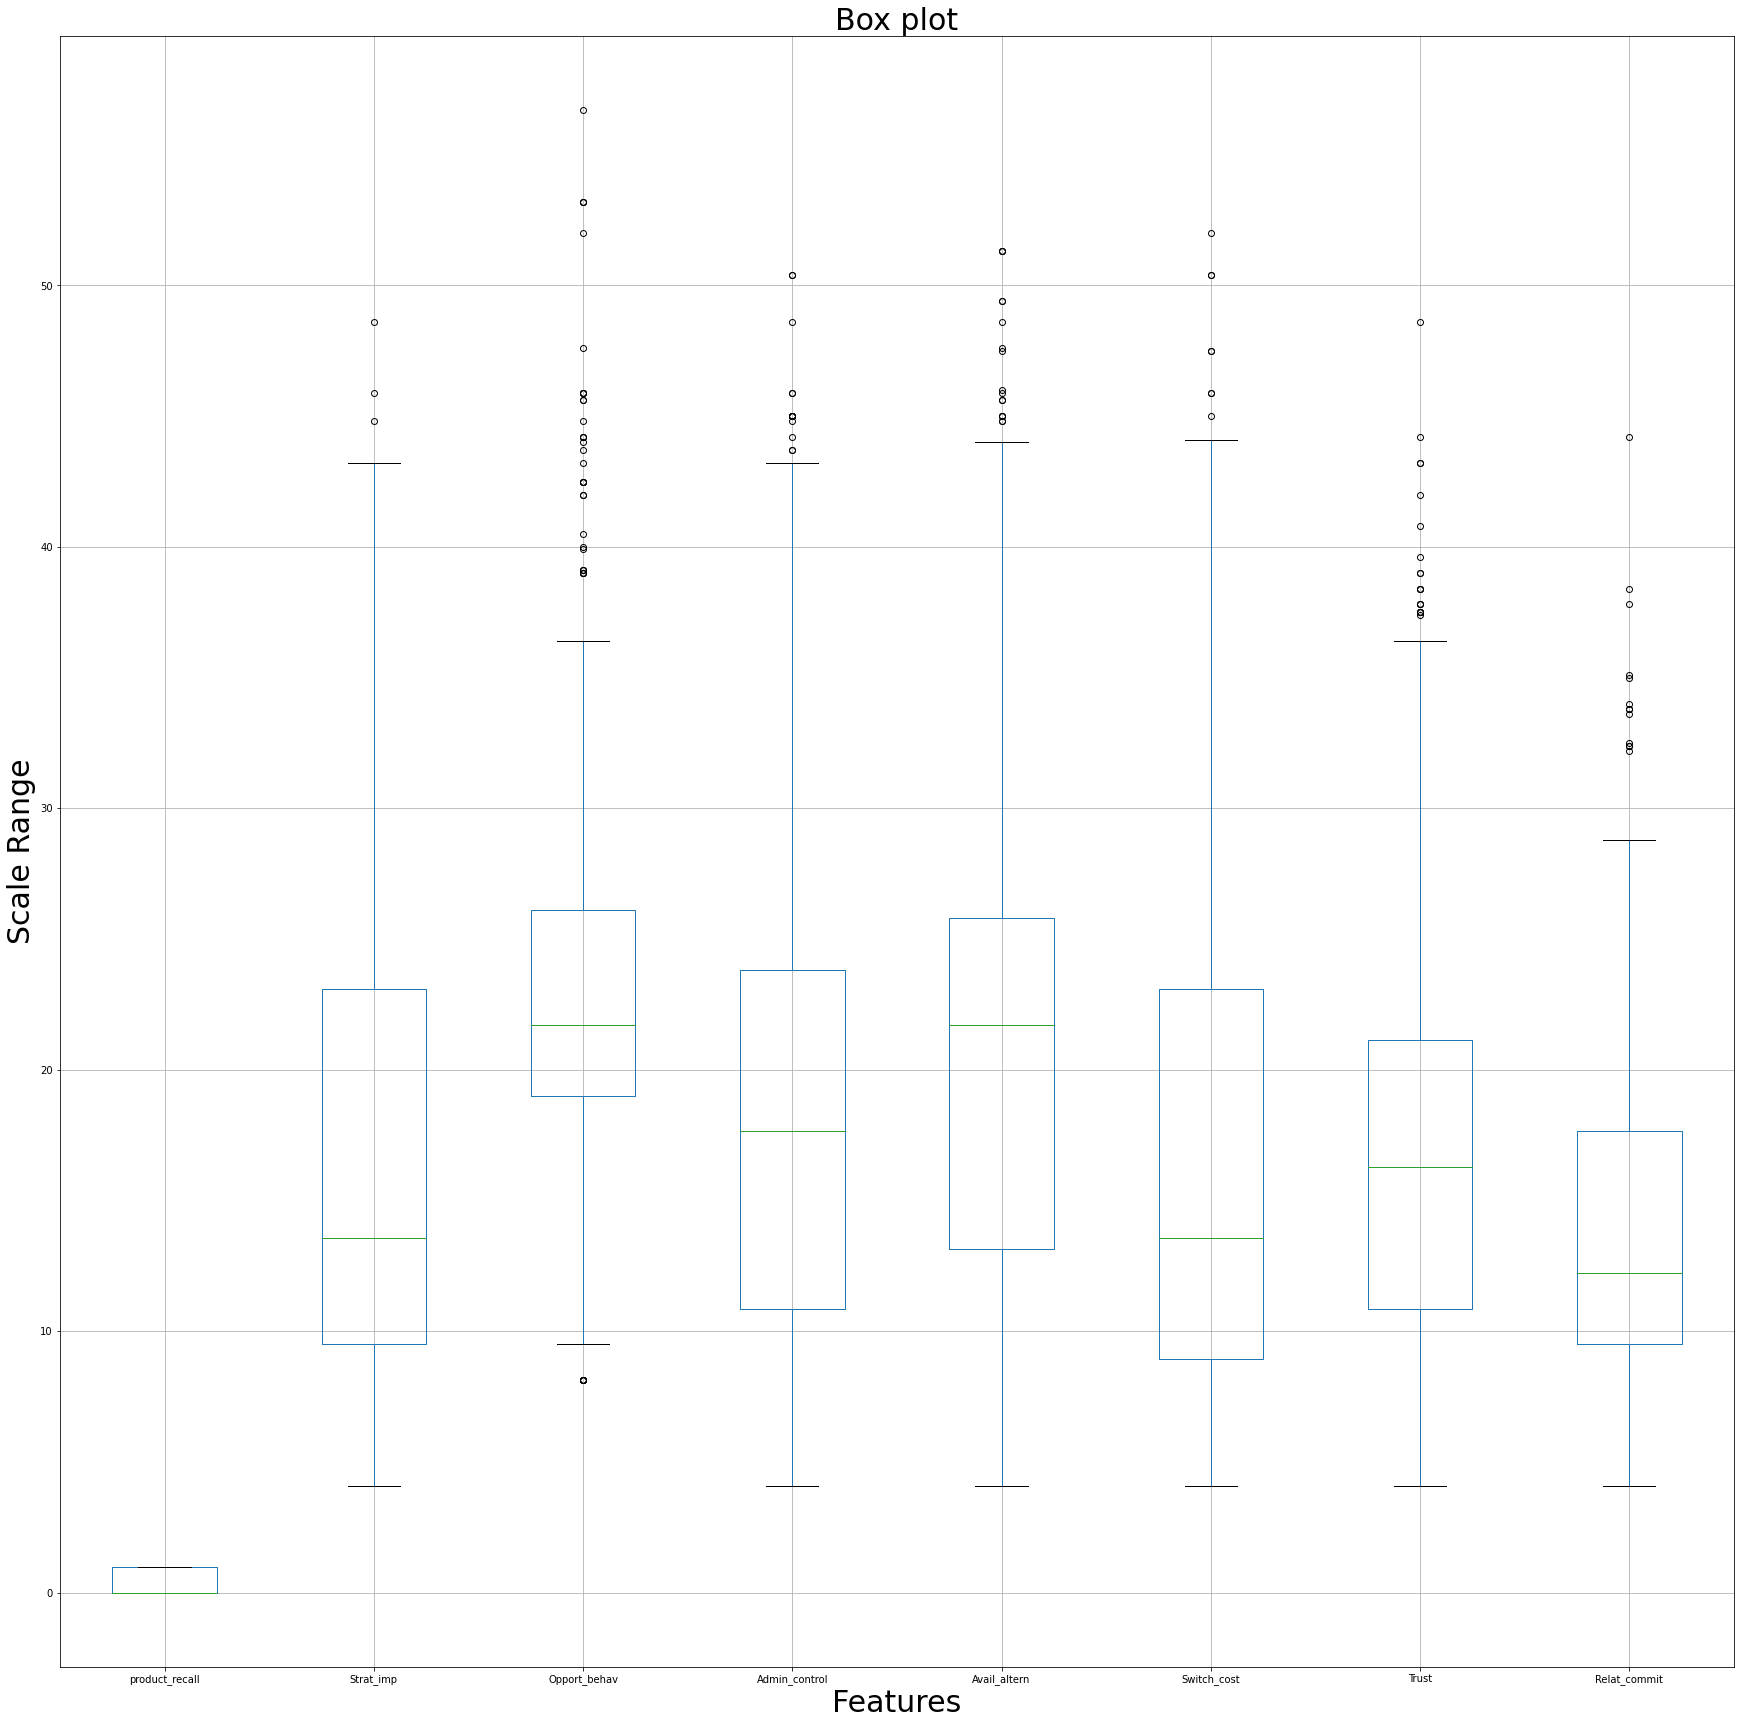

In [6]:
plt.rcParams["figure.figsize"] = (30,30)
df.boxplot()
plt.xlabel('Features',fontsize = 30)
plt.ylabel('Scale Range',fontsize = 30)
plt.title('Box plot',fontsize = 30)

(array([286.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 170.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

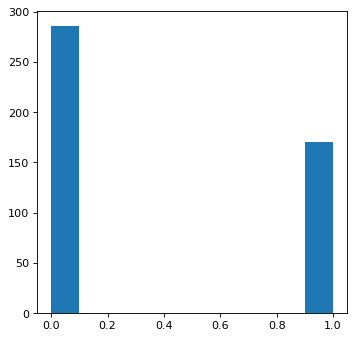

In [7]:
plt.figure(figsize=(5,5), dpi= 80)
plt.hist(df['product_recall'])

In [8]:
df.columns

Index(['product_recall', 'Strat_imp', 'Opport_behav', 'Admin_control',
       'Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit'],
      dtype='object')

## Density plots

In [9]:
df.columns

Index(['product_recall', 'Strat_imp', 'Opport_behav', 'Admin_control',
       'Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit'],
      dtype='object')

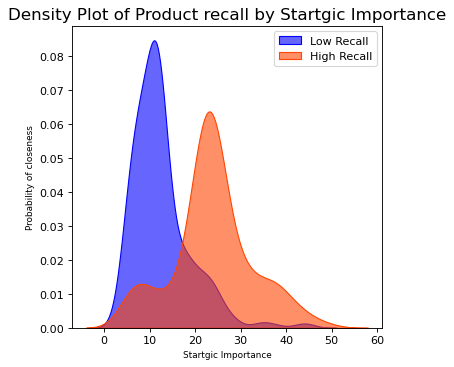

In [25]:
plt.figure(figsize=(5,5), dpi= 80)
sns.kdeplot(df.loc[df['product_recall'] == 0, 'Strat_imp'], shade=True, color="blue", label="Low Recall", alpha=.6)
sns.kdeplot(df.loc[df['product_recall'] == 1, 'Strat_imp'], shade=True, color="orangered", label="High Recall", alpha=.6)
plt.title('Density Plot of Product recall by Startgic Importance', fontsize=15)
plt.xlabel("Startgic Importance",fontsize=8)
plt.ylabel("Probability of closeness",fontsize=8)
plt.legend()
plt.show()

## Pairwise Plot

In [11]:
# Plot
imp_features = ['Strat_imp', 'Opport_behav', 'Admin_control','Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit','product_recall']


<Figure size 800x800 with 0 Axes>

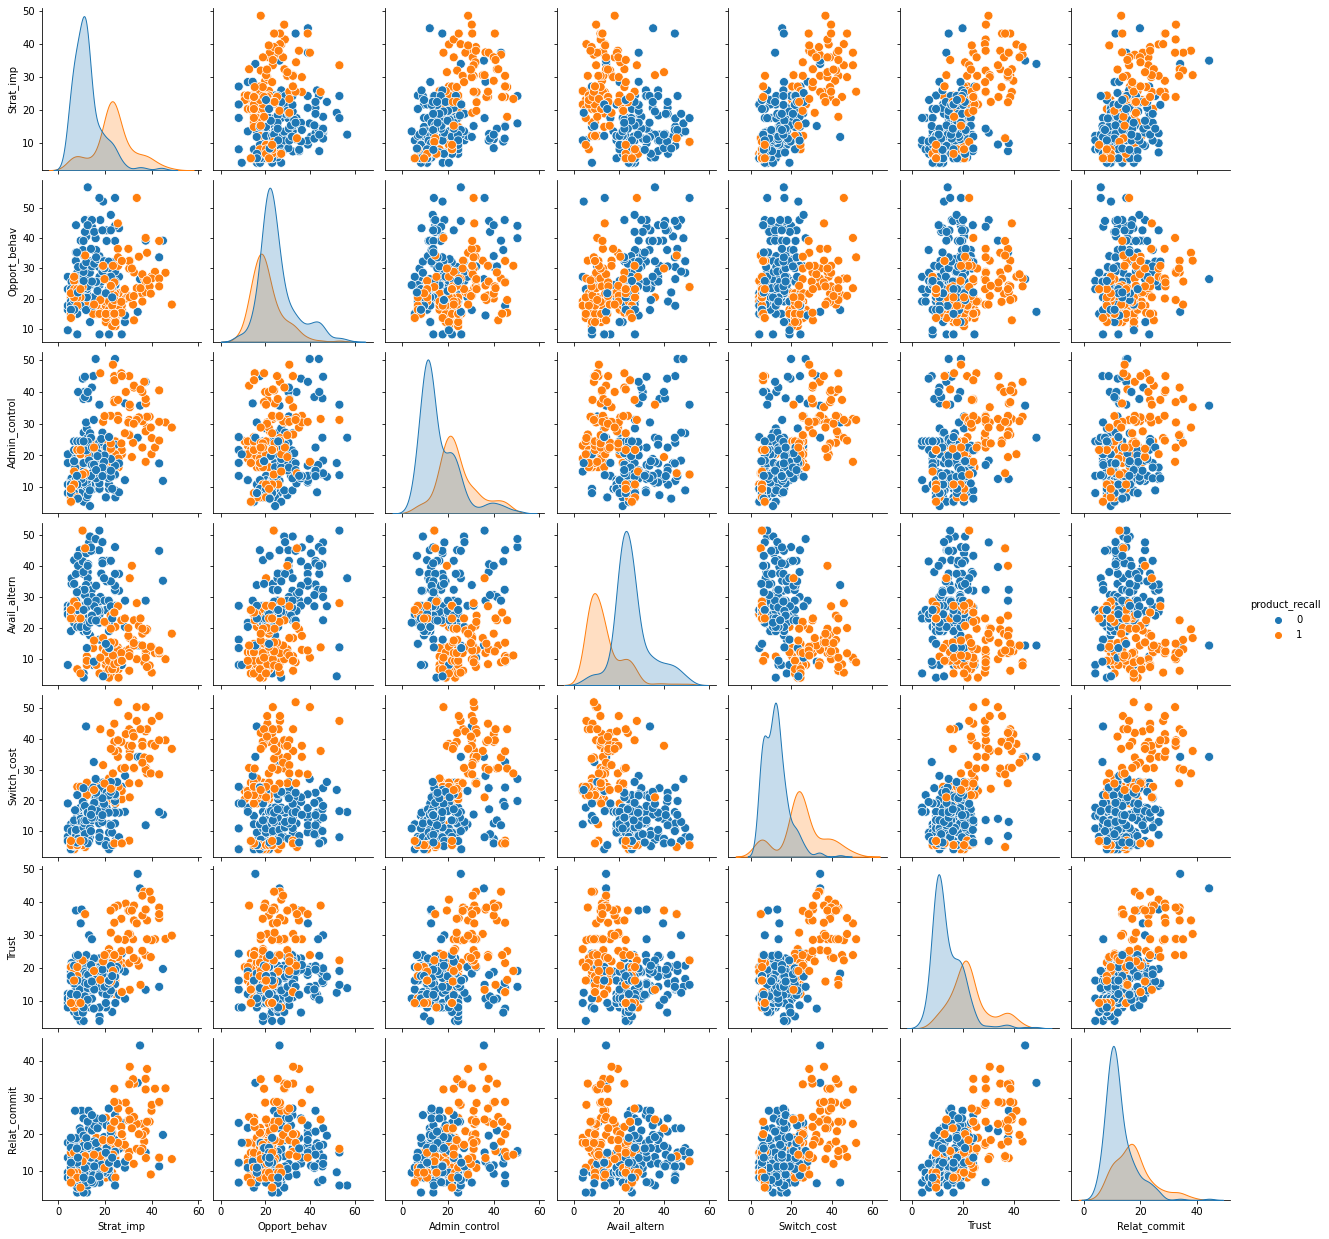

In [21]:
plt.figure(figsize=(10,10), dpi= 80)
sns.pairplot(df[imp_features], kind="scatter", hue='product_recall', plot_kws=dict(s=80),palette = sns.color_palette("tab10")[0:2])
plt.show()

## Correlation Analysis

In [13]:
df.columns

Index(['product_recall', 'Strat_imp', 'Opport_behav', 'Admin_control',
       'Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit'],
      dtype='object')

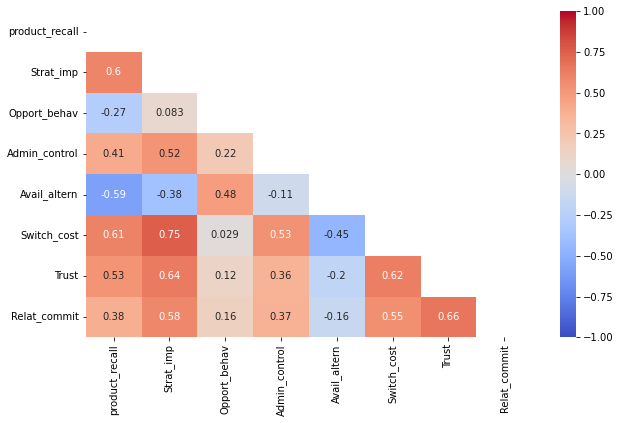

In [27]:
plt.figure(figsize=(10, 6))
imp_features2 = ['product_recall','Strat_imp', 'Opport_behav', 'Admin_control',
       'Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit']

mask = np.triu(np.ones_like(df[imp_features2].corr(method='pearson'), dtype=bool))
heatmap = sns.heatmap(df[imp_features2].corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [22]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap ='coolwarm')

,product_recall,Strat_imp,Opport_behav,Admin_control,Avail_altern,Switch_cost,Trust,Relat_commit
product_recall,1.000000,0.598156,-0.271418,0.407185,-0.591822,0.605366,0.526130,0.383934
Strat_imp,0.598156,1.000000,0.083117,0.524785,-0.380528,0.752881,0.635579,0.580325
Opport_behav,-0.271418,0.083117,1.000000,0.216263,0.481303,0.028911,0.122298,0.155401
Admin_control,0.407185,0.524785,0.216263,1.000000,-0.106522,0.531832,0.364193,0.367739
Avail_altern,-0.591822,-0.380528,0.481303,-0.106522,1.000000,-0.454065,-0.202470,-0.155406
Switch_cost,0.605366,0.752881,0.028911,0.531832,-0.454065,1.000000,0.622025,0.549259
Trust,0.526130,0.635579,0.122298,0.364193,-0.202470,0.622025,1.000000,0.662841
Relat_commit,0.383934,0.580325,0.155401,0.367739,-0.155406,0.549259,0.662841,1.000000
